## Predicting Income Levels with Logistic Regression: A Data Analysis and Machine Learning Approach

### Project Objective
Analyze a dataset to predict whether an individual earns more or less than $50K annually.  We demonstrate data cleaning, exploratory data analysis (EDA), feature engineering, statistical analysis, and a logistic regression model.

### Workflow Steps:
1. Load and clean data.
2. Perform EDA for insights and data visualization.
3. Implement ETL techniques for feature engineering.
4. Train and evaluate a logistic regression model.
5. Draw conclusions and provide insights.

---

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#### ETL Process

- select numerical columns in a subset
- clean data
- strip missing spaces with strip() method
- load enhanced data after cleaning

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=col_names)

# Data cleaning
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

# Basic data overview
print("Dataset Shape, that is: total rows x columns:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Dataframme structure:\n", df.head(3))

Dataset Shape, that is: total rows x columns: (32561, 15)
Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Dataframme structure:
    age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2

#### EDA - Basic statistics and visualizations

check for data imbalanced 

In [3]:
print("\nClass Imbalance:")
print(df.income.value_counts(normalize=True))


Class Imbalance:
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


-  Distribution PLot of most relevant numeric variables

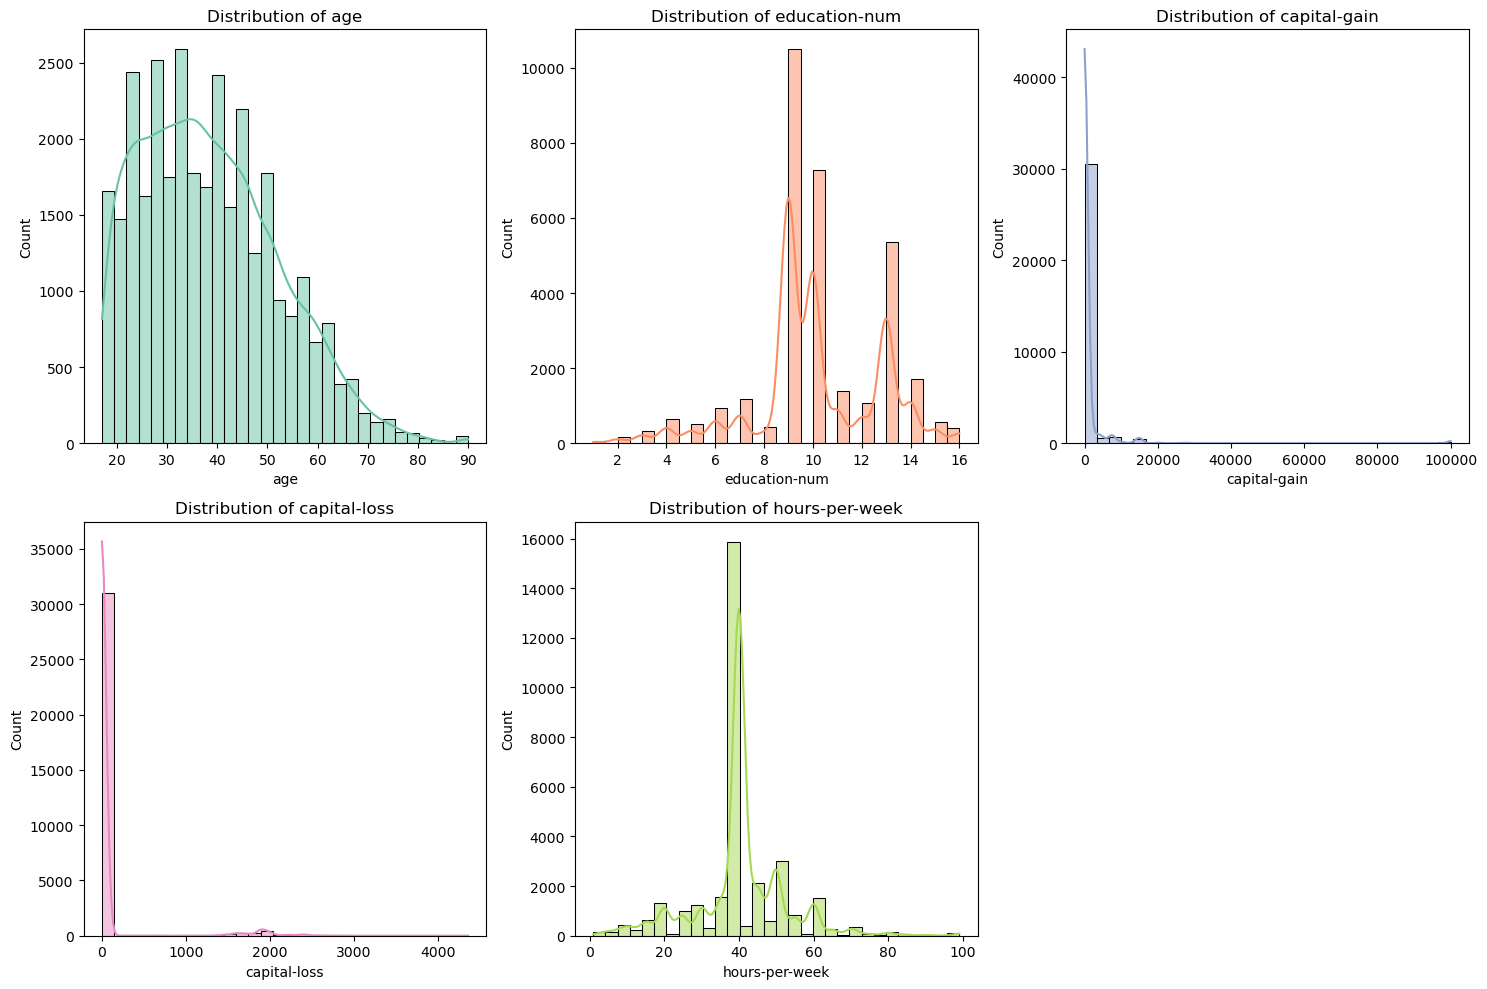

In [4]:
numeric_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(15, 10))
palette = sns.color_palette("Set2")  # Define the Set2 palette once
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color=palette[i % len(palette)])  # Use color from the palette
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

- We go over and look for categorical variable analysis

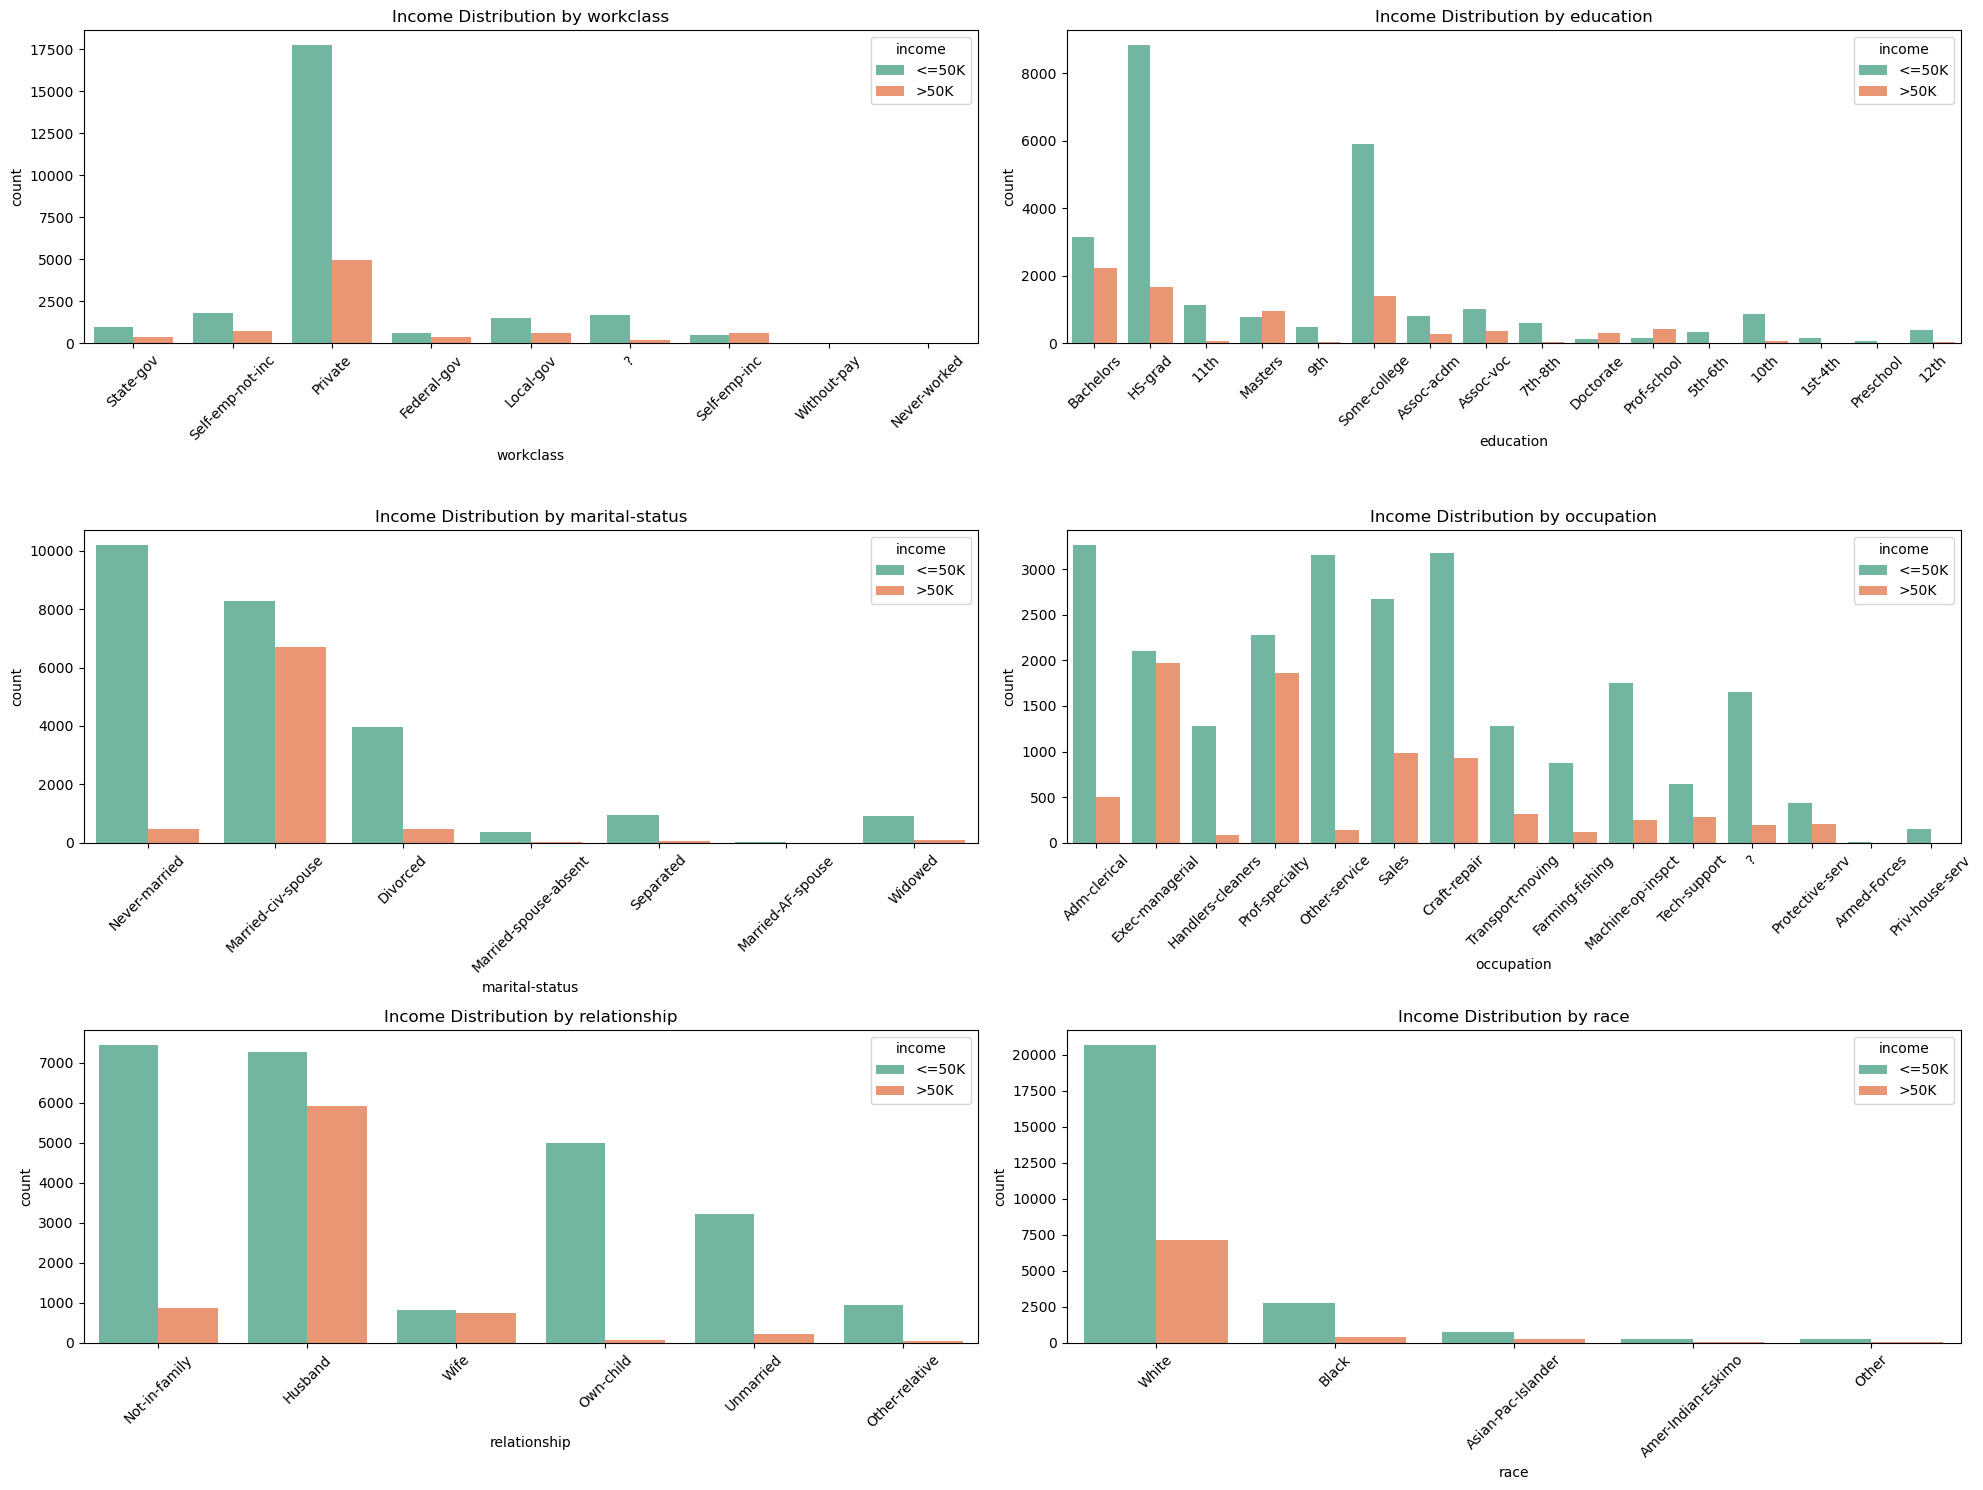

In [5]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols[:6]):  # Limiting to top 6 for clarity
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, hue='income', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Income Distribution by {col}")
plt.tight_layout()
plt.show()

#### Feature engineering and data transformation
- Create a feature dataframe  called "X" with the features columns and dummy variables for categorical features

In [6]:
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']

X = pd.get_dummies(df[feature_cols], drop_first=True)

- We need to create the output variable "y" which would be binary: 0 when income is less than 50k, 1 when it is greater than 50k


In [7]:
y = np.where(df.income == '<=50K', 0, 1)

- Plot a Correlation heatmap

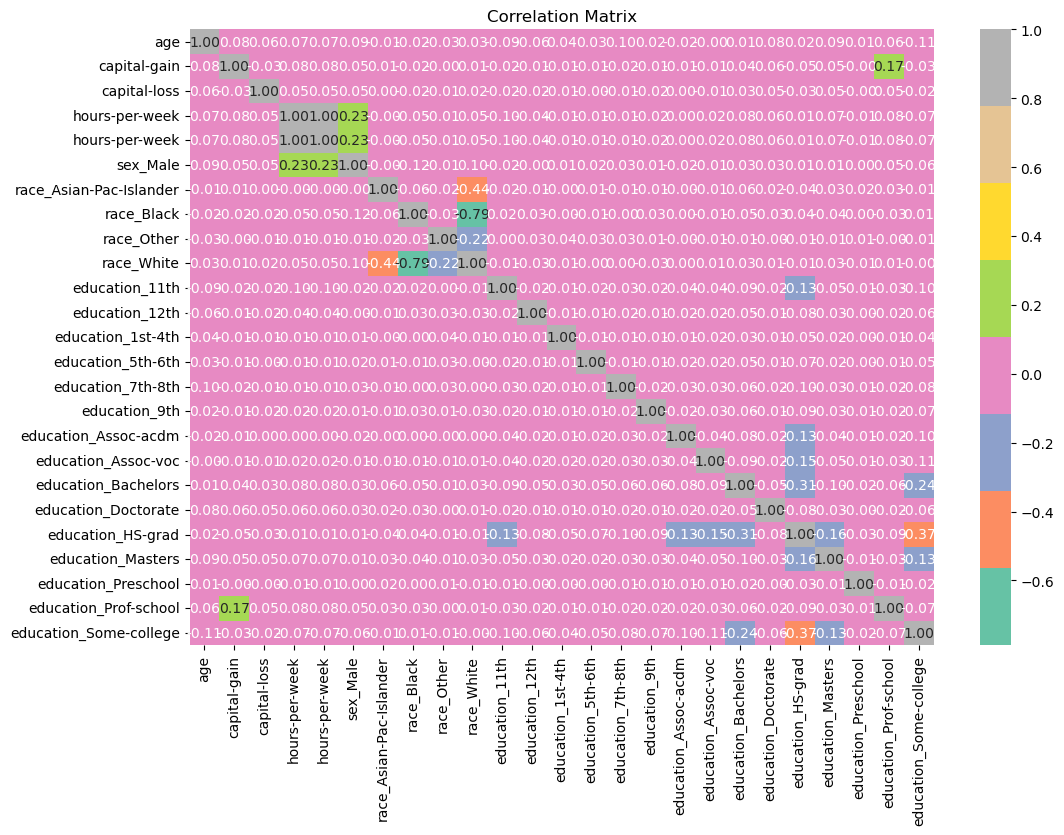

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='Set2', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Logistical Regression Model
- Data split: train vs and test set

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

- Model Training. Fit the LR model with sklearn on train set, and predicting on the test set


In [10]:
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#### Model evaluation
- Down below, we print the model parameters we obtain: a) intercept /  b)coefficients

In [11]:
print('\nModel Parameters, Intercept:')
print(log_reg.intercept_)

print('\nModel Parameters, Coeff:')
print(log_reg.coef_)


Model Parameters, Intercept:
[-5.38833024]

Model Parameters, Coeff:
[[ 3.55268715e-02  3.14006207e-04  6.65075301e-04  7.54235068e-03
   2.33067942e-02  1.01747566e+00  0.00000000e+00 -4.37708491e-01
   0.00000000e+00  7.30106803e-03 -5.85486877e-01  0.00000000e+00
   0.00000000e+00 -4.06066093e-01 -8.95074007e-01 -5.08851843e-01
   5.56940462e-01  5.33219706e-01  1.26542985e+00  1.79336146e+00
   0.00000000e+00  1.58675879e+00  0.00000000e+00  1.81136717e+00
   3.74948683e-01]]


- Lest´s evaluate the predictions of the model on the test set. We can then print the *confusion matrix* and *accuracy score*.


In [12]:
print('\nConfusion Matrix on test set:')
print(confusion_matrix(y_test , y_pred))

print('\nAccuracy Score on test set:')
print(log_reg.score(x_test , y_test))


Confusion Matrix on test set:
[[4785  241]
 [ 880  607]]

Accuracy Score on test set:
0.8278826961461692


In [13]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Confusion Matrix:
[[4785  241]
 [ 880  607]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      5026
           1       0.72      0.41      0.52      1487

    accuracy                           0.83      6513
   macro avg       0.78      0.68      0.71      6513
weighted avg       0.82      0.83      0.81      6513

Accuracy: 0.83, Precision: 0.72, Recall: 0.41, F1 Score: 0.52


#### Test the Model in new Data

- We will then create new DataFrame of the model coefficients and variable names; then sort thid values based on coefficient for the new dataframe


In [14]:
new_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
new_df = new_df[new_df.coef.abs()>0].sort_values('coef')
print(new_df)

                       var      coef
14       education_7th-8th -0.895074
10          education_11th -0.585487
15           education_9th -0.508852
7               race_Black -0.437708
13       education_5th-6th -0.406066
1             capital-gain  0.000314
2             capital-loss  0.000665
9               race_White  0.007301
3           hours-per-week  0.007542
4           hours-per-week  0.023307
0                      age  0.035527
24  education_Some-college  0.374949
17     education_Assoc-voc  0.533220
16    education_Assoc-acdm  0.556940
5                 sex_Male  1.017476
18     education_Bachelors  1.265430
21       education_Masters  1.586759
19     education_Doctorate  1.793361
23   education_Prof-school  1.811367


- Plot of the coefficients sorted in ascending order. A barplot would be an ideal option for this.

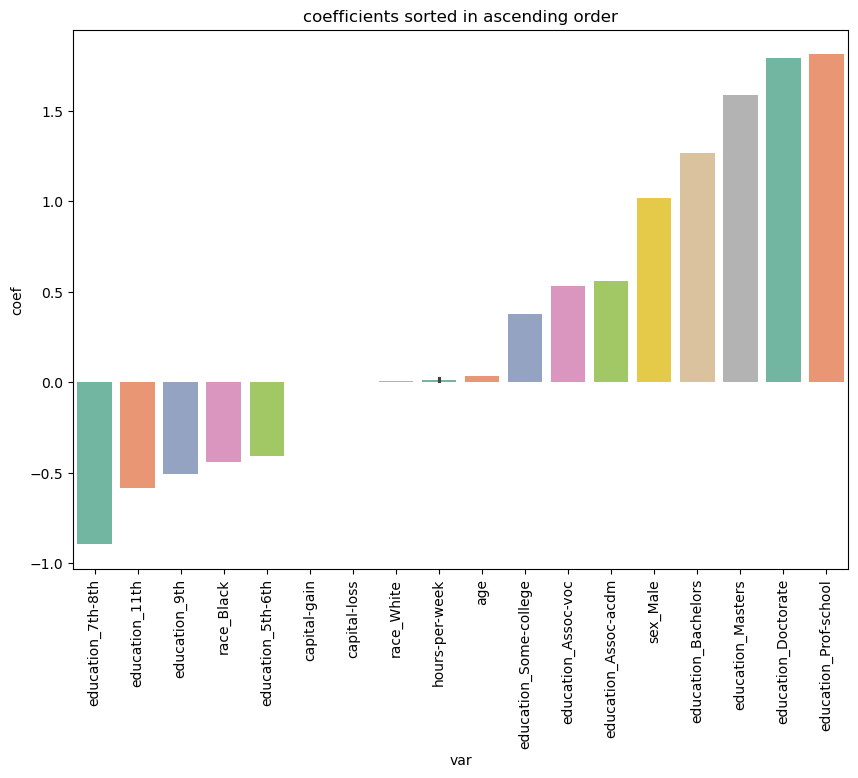

In [15]:
plt.figure(figsize = (10,7))
sns.barplot(x ='var', y = 'coef', data = new_df, palette='Set2', hue="var")
plt.title("coefficients sorted in ascending order")
plt.xticks(rotation=90) #lo dego para visualizar mucho mejor el gráfico
plt.show()
plt.close()

- ROC Curve and print the AUC value

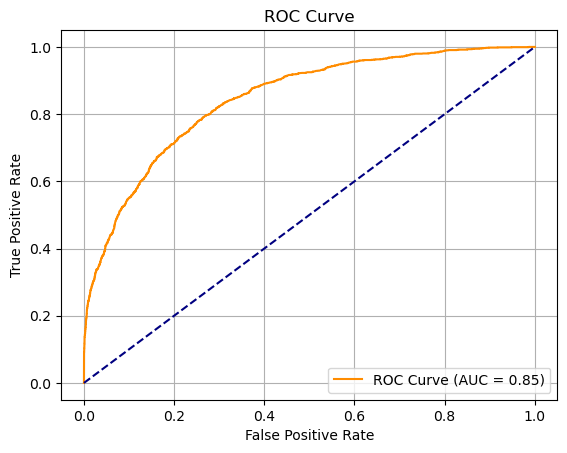

In [16]:
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Conclusions and Insights

### Model Performance
- The logistic regression model achieved an accuracy of 0.83, demonstrating reliable predictive performance.
- Precision of 0.72 and Recall of 0.41 scores highlight the model’s balance between minimizing false positives and maximizing true positives.
- The AUC score of 85% reflects strong model discrimination ability.

### Feature Analysis
- Features such as *capital-gain* and *education-num* significantly influenced the prediction of income levels.
- Other features, like *age* and *hours-per-week*, also contributed to the prediction but to a lesser extent.

### Recommendations for Improvement
1. **Feature Engineering**: Explore advanced techniques, such as polynomial features or interaction terms, to capture non-linear relationships.
2. **Hyperparameter Tuning**: Perform grid or random search for further optimization of model parameters.
3. **Alternative Models**: Consider using non-linear classifiers like Random Forest or Gradient Boosting to compare performance.

### Business Insights
- The analysis highlights that **higher education levels and significant capital gains are strong indicators of higher income**.
- Policies or programs aimed at education and skill development could improve income distribution and economic equity.
- Work hours alone are not a strong predictor, indicating that other factors, like job type and education, play more critical roles.

### Final Thoughts
This project demonstrates a complete data analysis workflow, from preprocessing to modeling and evaluation, showcasing essential skills for data science and machine learning applications. Future work could focus on expanding the dataset or testing additional algorithms to enhance predictions. The insights derived provide valuable directions for socio-economic policy and workforce planning.